⏳ Instalando herramientas...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00
✅ Instalación completa.

--- 1. GENERACIÓN DE MATERIAL DIDÁCTICO (Replicate) ---
Profesor, describa la imagen educativa que necesita (ej: un sistema solar realista): SISTEMA SOLAR
🎨 Generando imagen para: 'SISTEMA SOLAR'...
✅ Imagen generada: https://replicate.delivery/xezq/UmXGPeUrppVDBSYe6OfflODBgGyeUEOMieGqYmEWwytP2V8aF/tmpr5eccjfh.webp


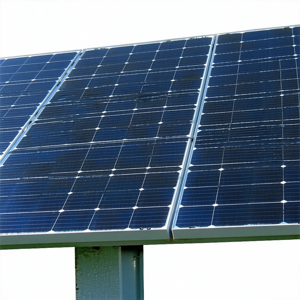

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.



--- 2. CREANDO ACCESIBILIDAD PARA ESTUDIANTES INVIDENTES (Hugging Face) ---
👁️ Analizando imagen con modelo BLIP...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

✅ Descripción automática (Alt-Text): 'solar panels on a roof'

--- 3. ANÁLISIS DE FEEDBACK ESTUDIANTIL (Hugging Face) ---
Estudiante, ¿qué opinas de este material? (ej: Es excelente / No se entiende): es exelente


config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


📊 Análisis del comentario: Neutral (Confianza: 0.6057)

🎉 ¡CICLO DEL CASO INTEGRADOR COMPLETADO!


In [1]:
# ==========================================
# CASO INTEGRADOR: GENERADOR DE MATERIAL DIDÁCTICO INCLUSIVO
# Herramientas: Replicate (Imagen) + HF (Descripción) + HF (Sentimiento)
# ==========================================

# 1. INSTALACIÓN DE LIBRERÍAS
print("⏳ Instalando herramientas...")
!pip install -q replicate transformers torch pillow requests
print("✅ Instalación completa.\n")

import os
import replicate
import requests
from PIL import Image
from io import BytesIO
from transformers import pipeline, BlipProcessor, BlipForConditionalGeneration

# ==========================================
# 2. CONFIGURACIÓN (¡PEGAR TUS TOKENS AQUÍ!)
# ==========================================
# Pega aquí tu token de Replicate (empieza por r8_...)
os.environ["REPLICATE_API_TOKEN"] = "r8_3b9YTVSzL5mcHEzcWi9Qnca5A8D1BLG1IpEko"

# ==========================================
# 3. EL PROCESO INTEGRADO
# ==========================================

def caso_integrador_educativo():
    # --- PASO A: DEFINIR EL RETO ---
    print("--- 1. GENERACIÓN DE MATERIAL DIDÁCTICO (Replicate) ---")
    prompt_profe = input("Profesor, describa la imagen educativa que necesita (ej: un sistema solar realista): ")

    if not prompt_profe: prompt_profe = "un sistema solar realista de alta calidad"

    print(f"🎨 Generando imagen para: '{prompt_profe}'...")

    # Usamos Stable Diffusion 3.5 Large (según tu PDF)
    output = replicate.run(
        "stability-ai/stable-diffusion-3.5-large",
        input={"prompt": prompt_profe}
    )

    # Obtener URL (Manejo de lista vs string explicado en tu PDF)
    image_url = output[0] if isinstance(output, list) else str(output)
    print(f"✅ Imagen generada: {image_url}")

    # Descargar imagen para procesarla
    response = requests.get(image_url)
    raw_image = Image.open(BytesIO(response.content)).convert('RGB')
    display(raw_image.resize((300, 300))) # Mostrar miniatura

    # --- PASO B: ACCESIBILIDAD (Hugging Face - BLIP) ---
    print("\n--- 2. CREANDO ACCESIBILIDAD PARA ESTUDIANTES INVIDENTES (Hugging Face) ---")
    print("👁️ Analizando imagen con modelo BLIP...")

    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    descripcion = processor.decode(out[0], skip_special_tokens=True)

    print(f"✅ Descripción automática (Alt-Text): '{descripcion}'")

    # --- PASO C: VALIDACIÓN/FEEDBACK (Hugging Face - Sentiment) ---
    print("\n--- 3. ANÁLISIS DE FEEDBACK ESTUDIANTIL (Hugging Face) ---")
    feedback = input("Estudiante, ¿qué opinas de este material? (ej: Es excelente / No se entiende): ")

    if not feedback: feedback = "Es un material excelente y muy claro"

    analyzer = pipeline("sentiment-analysis", model="tabularisai/multilingual-sentiment-analysis")
    resultado = analyzer(feedback)[0]

    print(f"📊 Análisis del comentario: {resultado['label']} (Confianza: {round(resultado['score'], 4)})")

    print("\n🎉 ¡CICLO DEL CASO INTEGRADOR COMPLETADO!")

# EJECUTAR TODO
caso_integrador_educativo()

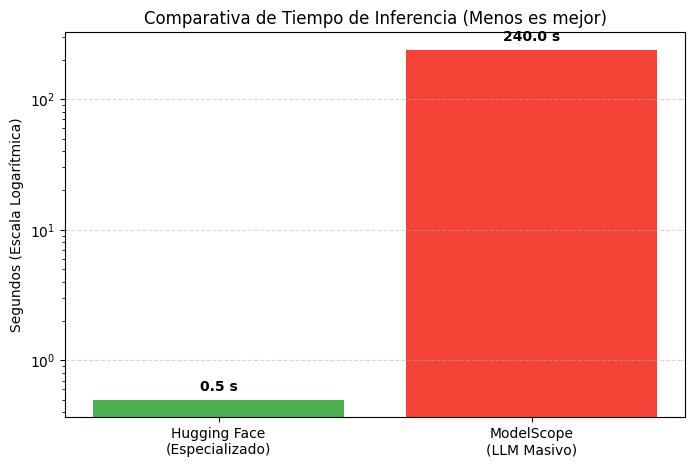

In [2]:
import matplotlib.pyplot as plt

# Datos reales de tu comparación
herramientas = ['Hugging Face\n(Especializado)', 'ModelScope\n(LLM Masivo)']
tiempos = [0.5, 240] # Segundos

plt.figure(figsize=(8, 5))
colores = ['#4CAF50', '#F44336'] # Verde para rápido, Rojo para lento
barras = plt.bar(herramientas, tiempos, color=colores)

plt.title('Comparativa de Tiempo de Inferencia (Menos es mejor)')
plt.ylabel('Segundos (Escala Logarítmica)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Poner los valores sobre las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura * 1.1,
             f'{altura} s', ha='center', va='bottom', fontweight='bold')

plt.show()